In [ ]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [ ]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [ ]:
# Define data generating functions
def quadratic_data_generator(data_size):
    # f(x) = y = x^2 + 4x - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
    '''
    y = ...
    '''
    # placeholder
    b = torch.ones(data_size,1)
    y = torch.mul(x,x) + 4*x -3*b
    return x,y
#testing
x, y = quadratic_data_generator(3)
print(x)
print(y)

def cubic_data_generator(data_size=100):
    # f(x) = y = x^3 + 4x^2 - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    # TODO
    '''
    y = ...
    '''
    # placeholder
    b = torch.ones(data_size,1)
    x_quad = torch.mul(x,x)
    y = torch.mul(x,x_quad) + 4*x_quad -3*b
  
    return x, y

x, y = cubic_data_generator(3)
print(x)
print(y)

tensor([[-0.7568],
        [-0.5450],
        [-1.4089]])
tensor([[-5.4544],
        [-4.8829],
        [-6.6506]])
tensor([[-0.6700],
        [-1.8532],
        [-2.0114]])
tensor([[-1.5053],
        [ 4.3728],
        [ 5.0453]])


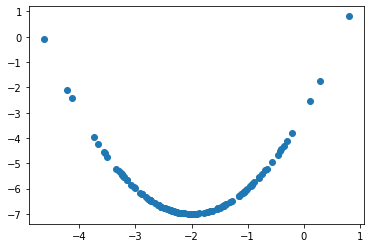

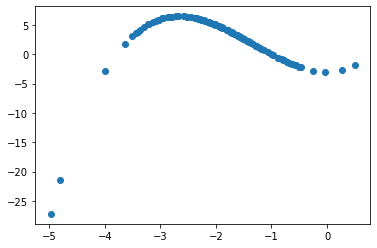

In [ ]:
# Generate the data with 128 datapoints
x, y = quadratic_data_generator(128)
plt.scatter(x,y)
plt.show()  
x, y = cubic_data_generator(128)
plt.scatter(x,y)
plt.show()  

In [ ]:
# Define a Linear Classifier with a single linear layer and no non-linearity
# (no hidden layer)
class Linear_0H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        self.classifier = nn.Sequential(
            nn.Linear(1,1)
        )

    def forward(self, x):
        return self.classifier(x)

In [ ]:
# Define a Linear Classifier with a single hidden layer of size 5 and ReLU non-linearity
class Linear_1H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        self.classifier = nn.Sequential(
            nn.Linear(1,5),
            nn.ReLU(),
            nn.Linear(5,1)
        )

    def forward(self, x):
        return self.classifier(x)

In [ ]:
# Define a Linear Classifier with a two hidden layers of size 5 and ReLU non-linearity
class Linear_2H(nn.Module):
    def __init__(self):
        super().__init__()

        # TODO
        self.classifier = nn.Sequential(
            nn.Linear(1,5),
            nn.ReLU(),
            nn.Linear(5,5),
            nn.ReLU(),
            nn.Linear(5,1)
        )
    def forward(self, x):
        return self.classifier(x)

In [ ]:
'''
TODO: Training function

Hint: look at some example pytorch tutorials to learn how to
    - initialize optimizers
    - zero gradient
    - backprop the loss
    - step the gradient


Note: This is full batch. We compute forward on whole x,y.
No need for dataloaders nor loop over batches. 
Just pass all of x to model's forward pass.
'''
def train(model, epochs, x, y):
    
    # Set model to training mode
    model.train()
    
    # Define MSE loss function
    criterion = torch.nn.MSELoss()
    
    # TODO: Define the SGD optimizer with learning rate 0.01
    optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
    
    for epoch in range(epochs):
        
        # TODO: Forward data through model to predict y
        y_pred = model.forward(x)
        
        # TODO: Compute loss in terms of predicted and true y
        loss = criterion(y_pred,y)

        # TODO: Zero gradient
        optimizer.zero_grad()
        
        # TODO: call backward on loss
        loss.backward()
        
        # TODO: step the optimizer
        optimizer.step()
        # every 100 epochs, print
        if (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            
    # return y_pred without gradient information, for plotting
    return y_pred.detach()

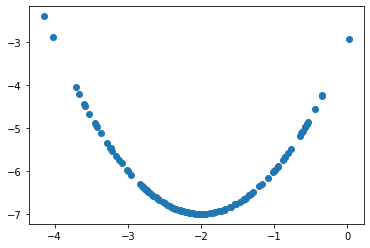

In [ ]:
x, y = quadratic_data_generator(128)
plt.scatter(x,y)
plt.show() 

Epoch 100 loss: 3.221874475479126
Epoch 200 loss: 2.2392215728759766
Epoch 300 loss: 1.6772419214248657
Epoch 400 loss: 1.3558452129364014
Epoch 500 loss: 1.1720383167266846
Epoch 600 loss: 1.0669193267822266
Epoch 700 loss: 1.0068016052246094
Epoch 800 loss: 0.9724206328392029
Epoch 900 loss: 0.9527578353881836
Epoch 1000 loss: 0.9415126442909241


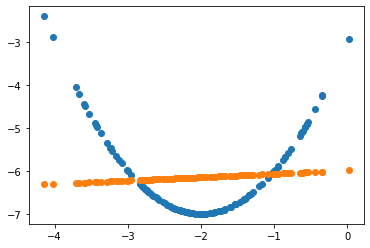

In [ ]:
# 0H model on quadratic data
model = Linear_0H()
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 1.0561646223068237
Epoch 200 loss: 0.9183710813522339
Epoch 300 loss: 0.8674623370170593
Epoch 400 loss: 0.798432469367981
Epoch 500 loss: 0.7185238003730774
Epoch 600 loss: 0.6294198632240295
Epoch 700 loss: 0.5323075652122498
Epoch 800 loss: 0.4342844784259796
Epoch 900 loss: 0.34398457407951355
Epoch 1000 loss: 0.26817038655281067


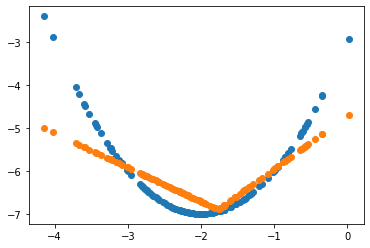

In [ ]:
# 1H model on quadratic data
model = Linear_1H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 0.5498625040054321
Epoch 200 loss: 0.25688207149505615
Epoch 300 loss: 0.1538226306438446
Epoch 400 loss: 0.10677432268857956
Epoch 500 loss: 0.25375911593437195
Epoch 600 loss: 0.15989550948143005
Epoch 700 loss: 0.15848839282989502
Epoch 800 loss: 0.11305069923400879
Epoch 900 loss: 0.10554904490709305
Epoch 1000 loss: 0.11241690814495087


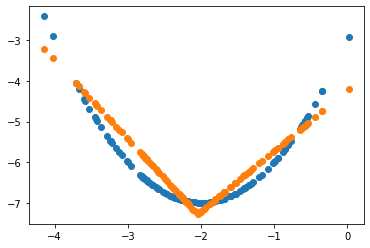

In [ ]:
# 2H model on quadratic data
model = Linear_2H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

In [ ]:
# Generate cubic data with 128 data points
x, y = cubic_data_generator(128)

Epoch 100 loss: 8.309871673583984
Epoch 200 loss: 8.218719482421875
Epoch 300 loss: 8.173563003540039
Epoch 400 loss: 8.151190757751465
Epoch 500 loss: 8.140107154846191
Epoch 600 loss: 8.134615898132324
Epoch 700 loss: 8.131896018981934
Epoch 800 loss: 8.130548477172852
Epoch 900 loss: 8.12987995147705
Epoch 1000 loss: 8.129549026489258


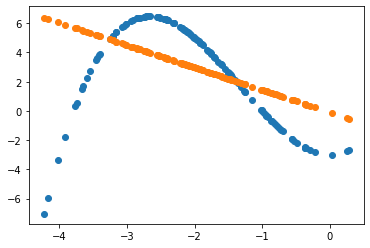

In [ ]:
# 0H model on cubic data
model = Linear_0H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 7.301842212677002
Epoch 200 loss: 6.3439836502075195
Epoch 300 loss: 5.627307891845703
Epoch 400 loss: 4.923264503479004
Epoch 500 loss: 4.103036403656006
Epoch 600 loss: 3.279965877532959
Epoch 700 loss: 2.623178005218506
Epoch 800 loss: 2.210911750793457
Epoch 900 loss: 2.1160926818847656
Epoch 1000 loss: 2.334967613220215


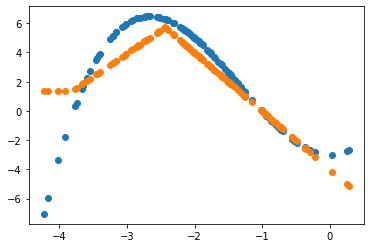

In [ ]:
# 1H model on cubic data
model = Linear_1H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 8.379804611206055
Epoch 200 loss: 8.017607688903809
Epoch 300 loss: 6.884670257568359
Epoch 400 loss: 6.2667412757873535
Epoch 500 loss: 4.047066688537598
Epoch 600 loss: 2.722088098526001
Epoch 700 loss: 1.7982940673828125
Epoch 800 loss: 1.3074183464050293
Epoch 900 loss: 1.0392247438430786
Epoch 1000 loss: 0.47884756326675415


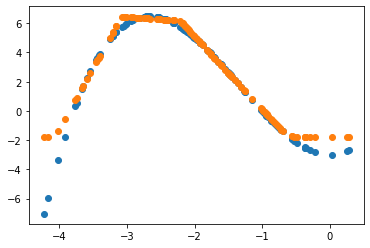

In [ ]:
# 2H model on cubic data
model = Linear_2H()
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()